In [1]:
import aocd
import re
import networkx as nx
from operator import and_, or_, lshift, rshift, invert
from functools import partial, cache

In [2]:
data = aocd.get_data(day=7, year=2015)
instructions = [line.split(' -> ') for line in data.splitlines()]

In [3]:
re_number = re.compile(r'[0-9]+$')
re_wire   = re.compile(r'[a-z]+$')
re_not    = re.compile(r'NOT ([a-z]+)')
re_lshift = re.compile(r'([a-z]+) LSHIFT ([0-9]+)')
re_rshift = re.compile(r'([a-z]+) RSHIFT ([0-9]+)')
re_or     = re.compile(r'([a-z]+) OR ([a-z]+)')
re_and    = re.compile(r'([a-z]+) AND ([a-z]+)')
re_and1   = re.compile(r'1 AND ([a-z]+)')

def parse_instruction(instr):
    if m := re_number.match(instr):
        return (), lambda: int(m[0])
    elif m := re_wire.match(instr):
        return (m[0],), lambda x: x
    elif m := re_not.match(instr):
        return (m[1],), invert
    elif m := re_lshift.match(instr):
        return (m[1],), lambda x: lshift(x, int(m[2])) # partial(lshift, __b=int(m[2]))
    elif m := re_rshift.match(instr):
        return (m[1],), lambda x: rshift(x, int(m[2]))
    elif m := re_or.match(instr):
        return (m[1], m[2]), or_
    elif m := re_and.match(instr):
        return (m[1], m[2]), and_
    elif m := re_and1.match(instr):
        return (m[1],), partial(and_, 1)
    else:
        raise ValueError(instr)

In [4]:
G = nx.DiGraph()
for left, right in instructions:
    inputs, func = parse_instruction(left)
    for inp in inputs:
        G.add_edge(inp, right)
    G.nodes[right]['func'] = func

In [5]:
@cache
def evaluate(node):
    inputs = [evaluate(pred) for pred in G.predecessors(node)]
    return G.nodes[node]['func'](*inputs)

In [6]:
task1 = evaluate('a')
print(task1)

evaluate.cache_clear()
G.nodes['b']['func'] = lambda: 46065

task2 = evaluate('a')
print(task2)

46065
14134


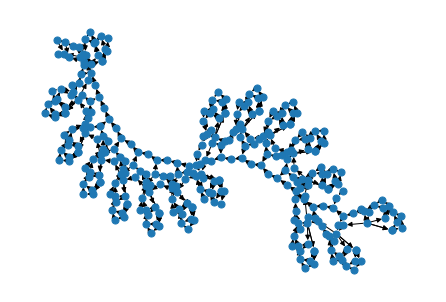

In [7]:
nx.draw_kamada_kawai(G, node_size=50)